# Microsoft Custom Vision Service - Fashion Items Classification

Now you have created a fashion classification model in [Microsoft Custom Vision service](https://customvision.ai/) you can call/test this model via a prediction API. 

The model we have built uses the Fashion MNIST dataset to classify clothing items into 10 categories. The data can be found here: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist) 

| Label Number      | Label Text  |
| ------------- |:-------------:|
| 0      | tshirt |
| 1      | trouser |
| 2      | jumper |
| 3      | dress |
| 4      | coat |
| 5      | sandal |
| 6      | shirt |
| 7      | trainers |
| 8      | bag |
| 9      | boots |

By filling in your keeys and IDs below you can send a test image to the Prediction API for this model and recieve a JSON result wiht name of class and accuarcy. The accuarcy is how sure/probable the model thinks the image is of being a 'dress', 'trainers', 'bag' etc. 

**Run the code below to see the images of the files. Relace the file names with files in the 'test' folder to see other items**

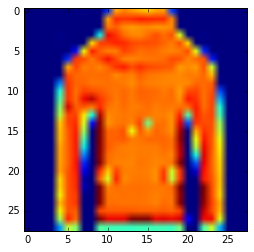

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('../dataset/test/2label_image10034.png', 'r')
imshow(np.asarray(pil_im))

**Replace the customvisionapi_key and custom_vision_url variables with your keys and IDs to execute the code below**

In [ ]:
import httplib, urllib, base64, json
 
customvisionapi_key = '<<prediction key here>>'
uri_base = 'southcentralus.api.cognitive.microsoft.com'
headers = {
    'Prediction-Key': customvisionapi_key,
    'Content-Type': 'application/json'
}
 

body = "{'Url': 'https://raw.githubusercontent.com/amynic/deep-learning-fashion/master/dataset/test/0label_image10007.png'}"
# All images are listed here: https://github.com/amynic/deep-learning-fashion/tree/master/dataset/test 
# change the filename to test different files
 
#enter everything after - https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/ as custom_vision_url variable
 
custom_vision_url = "<projectid>/url?iterationId=<iterationid>" 
 
try:
    # Execute the REST API call and get the response.
    conn = httplib.HTTPSConnection(uri_base)
    conn.request("POST", "/customvision/v2.0/Prediction/" + custom_vision_url, body, headers)
    response = conn.getresponse()
    data = response.read()
 
    # 'data' contains the JSON data. The following formats the JSON data for display.
    parsed = json.loads(data.decode())
    print ("Response:")
    print (json.dumps(parsed, sort_keys=True, indent=2))
    
    #print ("Most likely to be:")
    #print (json.dumps(parsed["predictions"][0]["tagName"], sort_keys=True, indent=2))
    
    conn.close()
 
except Exception as e:
    print('Error:')
    print(e)